In [15]:
import numpy as np
import matplotlib.pyplot as plt

from music import *
from matched_beamforming import *
from utils import *
from flexibeam import *

In [16]:
real_data_folder = "../data/"
real_data_1 = real_data_folder + "data_1.npz"
real_data_2 = real_data_folder + "data_2.npz"

def load_data(data_str):
    npz_data = np.load(data_str)
    return npz_data["XYZ"], npz_data["S"], float(npz_data["T_slot"]), float(npz_data["lambda_"]), npz_data["src_model"]

**Dataset 1**

In [17]:
# Parameters for MUSIC

resolution = 0.15
time_t = 0

antenna_positions, cov, timeslot_durations, wavelength, transmitter_positions = load_data(real_data_1)
doas, widths, _, _, _ = music_algorithm(cov[time_t], antenna_positions, wavelength, 13, resolution=resolution)
print(doas)
print(widths)

b_gains, ts, _ = flexibeam(antenna_positions, doas, widths, wavelength)
b_gains.shape, ts.shape

[ 93.3  200.7  224.1  243.9  261.45]
[ 4.22883356  5.34833018  9.12347411 31.2373853   3.91331811]


((10000,), (10000,))

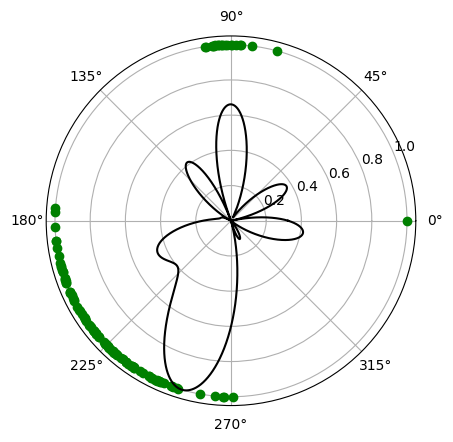

In [18]:
plt.polar(list(map(cartesian_to_arg,transmitter_positions)), np.ones(len(transmitter_positions)), "go", ts, b_gains/np.max(b_gains), '-k')
plt.show()

**Dataset 2**

In [19]:
# Parameters for MUSIC

resolution = 0.15
time_t = 0

antenna_positions, cov, timeslot_durations, wavelength, transmitter_positions = load_data(real_data_2)
doas, widths, _, _, _ = music_algorithm(cov[time_t], antenna_positions, wavelength, 7, resolution=resolution)

b_gains, ts, _ = flexibeam(antenna_positions, doas, widths, wavelength)
b_gains.shape, ts.shape

((10000,), (10000,))

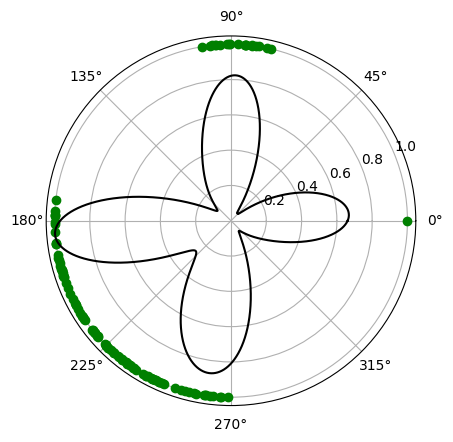

In [20]:
plt.polar(list(map(cartesian_to_arg,transmitter_positions)), np.ones(len(transmitter_positions)), "go", ts, b_gains/np.max(b_gains), '-k')
plt.show()

In [21]:
def average_throughput(real_data):
    antenna_positions, cov, timeslot_durations, wavelength, transmitter_positions = load_data(real_data)
    channel_bandwidth_per_user=2e6
    noise_level=0.1
    c0=0.8
    resolution=1e-4

    r_user = np.zeros(len(transmitter_positions))

    widths = np.array([1]*len(transmitter_positions))

    transmitter_angles = []
    for pos in transmitter_positions:
        a = (cartesian_to_arg(pos) % (2 * np.pi)) * 180 / np.pi
        transmitter_angles.append(a)

    transmitter_angles = np.array(transmitter_angles)

    i = 0
    b_gain, _, _ = flexibeam(antenna_positions, transmitter_angles, widths, wavelength, resolution=resolution)
    for pos in transmitter_positions:
        angle = cartesian_to_arg(pos)
        if(angle < 0):
            angle = angle + 2*np.pi
        angle_res = int(int(1./resolution) * angle/(2*np.pi))
        b = b_gain[angle_res]
        r_user[i] = channel_bandwidth_per_user * np.log2(1 + c0 * (b ** 2) / noise_level)
        i += 1

    return np.mean(r_user)

In [22]:
print(average_throughput(real_data_1))

8771834.912503352


In [23]:
print(average_throughput(real_data_2))

10860139.940726815
